## single input, single output을 가진 모델 간의 결합

In [ ]:
from tensorflow.keras.datasets import cifar10

* Step 1. Input tensor 와 Target tensor 준비(훈련데이터)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

* Step 2. 입력데이터의 전처리 

In [ ]:
train_images = train_images/255.
test_images = test_images/255.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape, test_labels.shape

((50000, 10), (10000, 10))

* Step3. CNN 모델 디자인

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# feature_extractor model :
#  - conv layer(filter=32, size=(3,3)), pooling layer(max, (2, 2))
#  - conv layer(filter=64, size=(3,3)), pooling layer(max, (2, 2))
#  - conv layer(filter=64, size=(3,3))

In [ ]:
# feature_extracion 모델 구성
image_input = keras.Input(shape=(32, 32, 3), name='image_input')

x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
feature_output = layers.Conv2D(64, (3, 3), activation='relu', name='feature_output')(x)

In [ ]:
# 모델 객체 생성
feature_extractor = keras.Model(
    inputs=image_input,
    outputs=feature_output,
    name='feature_extractor'
)

In [ ]:
feature_extractor.summary()

Model: "feature_extractor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
feature_output (Conv2D)      (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_____________________________________________

In [ ]:
# classification model :
# flatten : 
# classification : 
#  - dense layer(perceptron=64, f(x)='relu')
#  - dense layer(perceptron=10, f(x)='softmax')

In [ ]:
# classification 모델 구성
feature_input = keras.Input(shape=(4, 4, 64), name='feature_input')

x = layers.Flatten()(feature_input)
x = layers.Dense(64, 'relu')(x)
classification_output = layers.Dense(10, 'softmax', name='classification_output')(x)

In [ ]:
# 모델 객체 생성
classification = keras.Model(
    inputs=feature_input,
    outputs=classification_output,
    name='classification'
)

In [ ]:
classification.summary()

Model: "classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_input (InputLayer)   [(None, 4, 4, 64)]        0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
classification_output (Dense (None, 10)                650       
Total params: 66,250
Trainable params: 66,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# feature_extractor 모델과 classification 모델을 결합하는 path 디자인
input = keras.Input(shape=(32,32,3), name='input')

feature = feature_extractor(input)
output = classification(feature)

In [ ]:
# feature_extractor 모델과 classification 모델을 결합하는 모델 객체 생성
model = keras.Model(
    inputs=input,
    outputs=output,
    name='CIFAR_CNN'
)

In [ ]:
model.summary()

Model: "CIFAR_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
feature_extractor (Functiona (None, 4, 4, 64)          56320     
_________________________________________________________________
classification (Functional)  (None, 10)                66250     
Total params: 122,570
Trainable params: 122,570
Non-trainable params: 0
_________________________________________________________________


* Step4. 학습에 필요한 정보 설정

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

* Step5. 모델에 데이터 연결하여 학습

In [ ]:
model.fit(x=train_images, y=train_labels,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 21s 4ms/step - loss: 1.5648 - accuracy: 0.4281 - val_loss: 1.3644 - val_accuracy: 0.5035
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2115 - accuracy: 0.5709 - val_loss: 1.1807 - val_accuracy: 0.5794
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0584 - accuracy: 0.6268 - val_loss: 1.0542 - val_accuracy: 0.6363
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9499 - accuracy: 0.6670 - val_loss: 0.9682 - val_accuracy: 0.6649
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8703 - accuracy: 0.6945 - val_loss: 0.9697 - val_accuracy: 0.6648
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8076 - accuracy: 0.7171 - val_loss: 0.8960 - val_accuracy: 0.6869
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7560 - accuracy: 0.7361 - val_loss: 0.8775 - val_accuracy

* Step6. test 데이터 셋을 이용하여 모델의 성능 평가

In [ ]:
test_loss, test_accuracy = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9207 - accuracy: 0.6934


## ensemble 모델

* Step3. ensemble CNN 모델 디자인

In [ ]:
# model_1 모델 구성
# feature_extractor model :
#  - conv layer(filter=32, size=(3,3)), pooling layer(max, (2, 2))
#  - conv layer(filter=64, size=(3,3)), pooling layer(max, (2, 2))
#  - conv layer(filter=64, size=(3,3))
# flatten : 
# classification : 
#  - dense layer(perceptron=64, f(x)='relu')
#  - dense layer(perceptron=10, f(x)='softmax')

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_1 = keras.Input(shape=(32, 32, 3), name='input_1')

x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_1)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)

x = layers.Flatten()(x)

x = layers.Dense(64, 'relu')(x)
output_1 = layers.Dense(10, 'softmax', name='output_1')(x)

model_1 = keras.Model(
    inputs=input_1,
    outputs=output_1,
    name='model_1'
)

In [ ]:
# model_2 모델 구성
# feature_extractor model :
#  - conv layer(filter=32, size=(3,3))
#  - conv layer(filter=32, size=(5,5))
#  - conv layer(filter=64, size=(5,5))
#  - conv layer(filter=64, size=(7,7))
#  - conv layer(filter=128, size=(7,7))
#  - conv layer(filter=128, size=(9,9))
# flatten : 
# classification : 
#  - dense layer(perceptron=64, f(x)='relu')
#  - dense layer(perceptron=10, f(x)='softmax')

In [ ]:
# model_2 모델 구성
input_2 = keras.Input(shape=(32, 32, 3), name='input_2')

x = layers.Conv2D(32, (3, 3), activation='relu')(input_2)
x = layers.Conv2D(32, (5, 5), activation='relu')(x)
x = layers.Conv2D(64, (5, 5), activation='relu')(x)
x = layers.Conv2D(64, (7, 7), activation='relu')(x)
x = layers.Conv2D(128, (7, 7), activation='relu')(x)
x = layers.Conv2D(128, (9, 9), activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_2 = layers.Dense(10, activation='softmax', name='output_2')(x)

model_2 = keras.Model(
    inputs=input_2,
    outputs=output_2,
    name='model_2'
)

In [ ]:
# model_1 과 model_2를 결합하는 path 디자인
input = keras.Input(shape=(32, 32, 3), name='input')

y1 = model_1(input)
y2 = model_2(input)
output = layers.average([y1, y2])

In [ ]:
# model_1 과 model_2를 결합하는 모델 객체 생성
ensemble_model = keras.Model(
    inputs=input,
    outputs=output,
    name='ensemble_model'
)

In [ ]:
ensemble_model.summary()

Model: "ensemble_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 10)           122570      input[0][0]                      
__________________________________________________________________________________________________
model_2 (Functional)            (None, 10)           2040810     input[0][0]                      
__________________________________________________________________________________________________
average (Average)               (None, 10)           0           model_1[0][0]                    
                                                                 model_2[0][0]       

In [ ]:
from tensorflow.keras.utils import plot_model

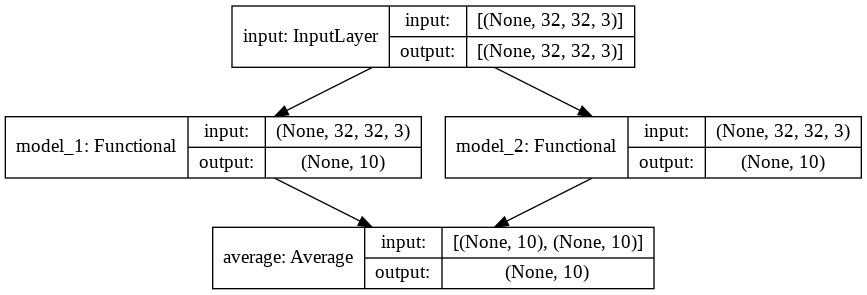

In [ ]:
plot_model(ensemble_model, show_shapes=True)

* Step4. 학습에 필요한 정보 설정

In [ ]:
ensemble_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ensemble_model.fit(x=train_images, y=train_labels,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8060 - accuracy: 0.3810 - val_loss: 1.5903 - val_accuracy: 0.4951
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5235 - accuracy: 0.5288 - val_loss: 1.4541 - val_accuracy: 0.5669
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4150 - accuracy: 0.5850 - val_loss: 1.3883 - val_accuracy: 0.6009
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3507 - accuracy: 0.6194 - val_loss: 1.3539 - val_accuracy: 0.6170
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2969 - accuracy: 0.6462 - val_loss: 1.3631 - val_accuracy: 0.6112
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2561 - accuracy: 0.6670 - val_loss: 1.3216 - val_accuracy: 0.6373
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2208 - accuracy: 0.6869 - val_loss: 1.2833 - val_ac

* Step5. 모델에 데이터 연결하여 학습

In [ ]:
test_loss, test_accuracy = ensemble_model.evaluate(x=test_images, y=test_labels)

## Multi Input, Multi Output model
* 사용자가 발급한 문의사항에 우선 순위를 매기고 관련 부서로 전달하는 시스템을 구축하는 경우
  * Input  
    * 문의사항의 제목 (텍스트 데이터)  
    * 문의사항의 본문 (텍스트 데이터)  
    * 사용자가 추가 한 태그 (범주 데이터)  

  * Output  
    * 0과 1 사이의 우선 순위 점수  
    * 문의사항을 처리해야하는 부서

In [ ]:
num_tags = 12        # tag의 종류 개수
num_words = 10000    # 텍스트 분석에 사용되는 토큰의 개수
num_departments = 4  # 문의사항을 처리하는 부서의 개수

In [ ]:
import numpy as np

* Step 1. Input tensor 와 Target tensor 준비(훈련데이터)

In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(num_tags, size=(1280,)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

In [ ]:
title_data[0]

array([1769, 4286, 8500, 7676, 1357, 3221, 8887,  666,  571, 9791])

In [ ]:
body_data[0]

array([2241, 2624, 2740, 6747, 5188,  840, 1683, 1657, 7224, 8171, 7306,
       7239, 1923, 9432, 4019, 2923, 1464,  290, 8860, 4394, 1347, 1808,
       2187,   16,  869, 4664, 3777, 4391, 2445, 9699, 3164, 2261, 6459,
       6048, 1742,  487, 9104, 2141,   73, 4862, 9156,  795, 3460, 2634,
       1821, 6142, 4013, 3442, 6674, 2640, 4658, 2735, 5181,  460, 6834,
       6137, 5244, 2899, 4802, 1331, 3084, 6594, 5870,  230, 8093, 1616,
       2686, 8610, 3706, 2600, 5794, 4566,  601,  187, 2655, 9142, 3462,
       8458, 5404, 5925, 7821, 4734, 9905, 4087, 5327, 8883, 7090, 4267,
       6388, 4738, 4212, 5200, 5926,  717, 1663, 2917, 9345, 6137, 3820,
       3238])

In [ ]:
tags_data[0]

5.0

In [ ]:
priority_targets[0]

array([0.95284676])

In [ ]:
dept_targets[:10]

array([[1, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 0]])

* Step2. Multi Input, Multi Output 모델 디자인

In [ ]:
# title 정보를 분석하기 위한 path 디자인
title_input = keras.Input(shape=(10, ), name='title')

title_featrures = layers.Embedding(input_dim=num_words, output_dim=64)(title_input)
# (None, 128)
title_featrures = layers.LSTM(128)(title_featrures)

In [ ]:
# body 정보를 분석하기 위한 path 디자인
body_input = keras.Input(shape=(100, ), name='body')

body_featrures = layers.Embedding(input_dim=num_words, output_dim=64)(body_input)
# (None, 32)
body_featrures = layers.LSTM(32)(body_featrures)

In [ ]:
# tag 정보를 분석하기 위한 path 디자인
# (None, 1,)
tag_input = keras.Input(shape=(1,), name='tag')

# (None, 1, 4)
tag_feature = layers.Embedding(input_dim=num_tags, output_dim=4)(tag_input)
# (None, 4)
tag_feature = layers.Reshape(target_shape=(4,))(tag_feature)

In [ ]:
# title, body, tag 정보를 분석한 3 path의 결과 feature 를 contatenate 하여 결합
# (None, 164(128+32+4))
x = layers.concatenate([title_featrures, body_featrures, tag_feature])

In [ ]:
# 우선순위 와 할당 부서를 선정하는 2개의 output layer 디자인
priority = layers.Dense(1, 'sigmoid', name='priority')(x)
department = layers.Dense(4, 'sigmoid', name='department')(x)

In [ ]:
# title, body, tag 정보를 받아 우선순위, 할당 부서를 출력 하는 모델 생성
model = keras.Model(
    inputs=[title_input, body_input, tag_input],
    outputs=[priority, department]
)

In [ ]:
from tensorflow.keras.utils import plot_model

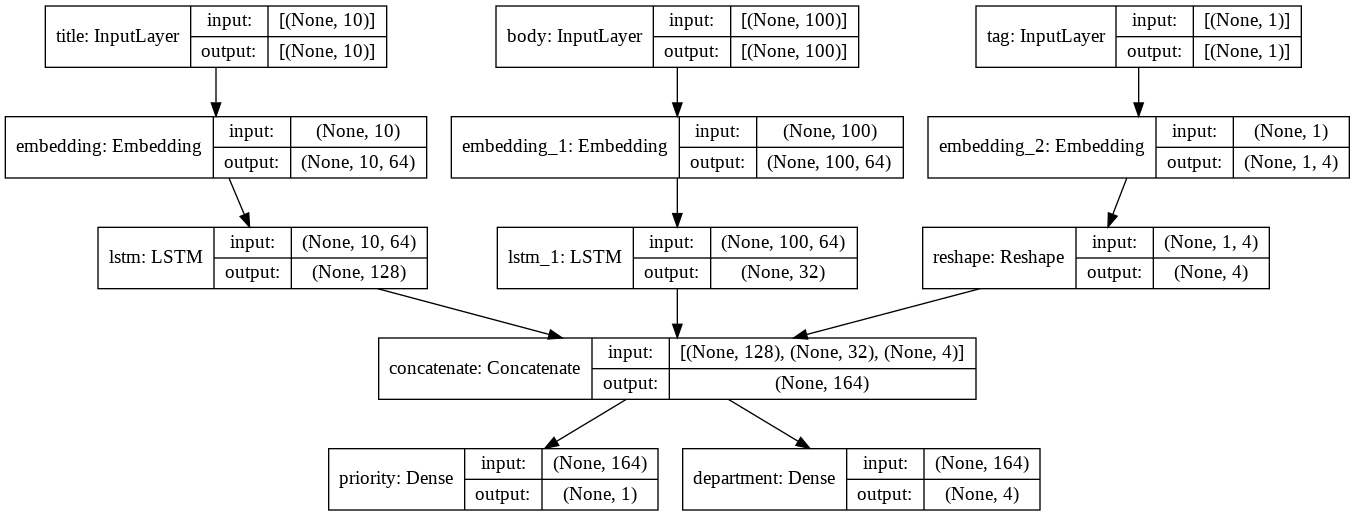

In [ ]:
plot_model(model, show_shapes=True)

* Step3. 학습에 필요한 정보 설정

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss={
        'priority': keras.losses.BinaryCrossentropy(),
        'department' : keras.losses.BinaryCrossentropy()
    },
    metrics={
        'priority': 'mae',
        'department' : 'accuracy'
    },
    loss_weights={
        'priority': 1.0,
        'department' : 0.2
    },
)

* Step4. 모델에 데이터 연결하여 학습

In [ ]:
model.fit(
    x={
       'title' : title_data,
       'body' : body_data,
       'tag' : tags_data
    },
    y={
      'priority': priority_targets,
      'department' : dept_targets
    },
    epochs=2,
    batch_size=32
)

Epoch 1/2
40/40 [==============================] - 6s 13ms/step - loss: 0.8321 - priority_loss: 0.6935 - department_loss: 0.6932 - priority_mae: 0.2444 - department_accuracy: 0.3633
Epoch 2/2
40/40 [==============================] - 1s 13ms/step - loss: 0.7765 - priority_loss: 0.6383 - department_loss: 0.6913 - priority_mae: 0.1898 - department_accuracy: 0.3969
